# Customer Outflow Model

The goal of any business is to make a profit. Distribution of resources is also associated with profit: it makes sense to invest the resources  in what brings it.
Banks are no exception. In today's market, each of them offers a large number of products, there is no shortage of offer, so customers can choose the best option for themselves.
Customers are a source of profit for banks, and their outflow, of course, has a negative impact on profits. Furthermore,according to market research results, retaining current customers is cheaper than attracting new ones.
From this point of view, it is important for any bank to have at its disposal a model that, depending on the behavior of a customer, would predict whether the she/he will leave.
In this study, we will analyze the data of Beta-Bank, which faced an outflow of customers.

Our task is to build a model that, based on customer behavior data, will predict whether a customer will leave the bank in the near future or not.
We will carry out work on building a prediction model based on historical data on customer behavior and termination of agreements with the bank.

We will get the above data from the following csv file: '/datasets/Churn.csv'.

From the task, we know that the file contains the following features:

* RowNumber - row index in the data
* CustomerId - unique customer identifier
* Surname - surname
* CreditScore - credit rating
* Geography - country of residence
* Gender - gender
* Age - age
* Tenure - how many years a person has been a bank customer
* Balance - account balance
* NumOfProducts - the number of bank products used by a customer
* HasCrCard - the presence of a credit card
* IsActiveMember - customer activity
* EstimatedSalary - estimated salary

Target feature:
* Exited - the fact that a customer left


**The purpose of this study** is to build an optimal model for prediction. The optimal model will be considered the one in which the value of the F1-measure (that is, the average harmonic of recall and precision) will be extremely large (minimum 0.59).


**Research progress**:

We will try to build a prediction model based on the basic data about Beta-Bank customers, for this we have to preprocess the data, divide the dataset into 3 samples, explore and possibly correct the balance of classes, choose the most appropriate model for training, the best way to train it, by adjusting the corresponding hyperparameters, check the quality of the model on the test set.


Thus, this project will include the following steps:
* data preprocessing
* study and adjustment of class balance
* model selection and training
* model quality check



## Data Preprocessing



In [1]:
import numpy as np  # importing numpy
import pandas as pd  # importing pandas
import seaborn as sns # importing seaborn for plotting
import os.path as path # importing os.path for managing path 
from sklearn.linear_model import LogisticRegression # importing linear regression
from sklearn.ensemble import RandomForestClassifier  # importing random forest
from sklearn.model_selection import train_test_split  # importing sample splitting function
from sklearn.tree import DecisionTreeClassifier  # importing decision tree
from sklearn.metrics  import f1_score, make_scorer, roc_auc_score, roc_curve  # importing necessary metrics
from sklearn.model_selection import GridSearchCV # importing GridSearchCV to search the best parameters
import warnings # importing warnings to ignore pandas warnings
warnings.simplefilter("ignore")
from sklearn.utils import shuffle # importing shuffle function
from sklearn.preprocessing import StandardScaler  # importing StandardScaler to scale quantitative features

Let's make the first idea about the data. For viewing and analysing, we will read the file in csv format, save it to a variable, and also look at the first 10 lines.



In [2]:
# reading csv file and saving to df
try:
    base_path = 'Churn.csv' 
    df = pd.read_csv(base_path) if path.exists(base_path) \
    else pd.read_csv(f'/datasets/{base_path}') # checking the file path
    display(df.head(10))  # getting first 10 rows
except:
     print('File not found') # if no path is correct, printing error message


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Next, we will get general information about the dataset and check the quality of the data:



In [3]:
df.info() # getting general information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


So, in our dataset there are 10,000 objects. The data type in each of them corresponds to the declared attribute, excepting the 'Tenure' column, which indicates the number of entire years during which a person has been a bank client, however, the data type in the dataframe is float. In the same column, at first glance, there are missing values. Let's check this assumption, and also convert the data from the above column to integers:



In [4]:
df.isna().mean() # checking the NaN's share per column

RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

As expected, missing values are present only in the 'Tenure' column, and are about 10% of them.
We know that there should be no NaNs in the data when building models. Although 10% is the generally accepted limit for the proportion of missing values, suitable for deletion, we will still process them differently - filling them with the median by feature. Next, we will process the data type in the column.



In [5]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True) # filling in NaNs with the column median value


In [6]:
df['Tenure'] = df['Tenure'].astype('int') # changing the datatype to int
df.info(10)  # checking the result


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int32  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(8), object(3)
memory usage: 1.0+ MB


Let's also check if there are full duplicates in our dataset: since the client ID is unique, in the data  each object must be unique:



In [7]:
 df.duplicated().sum() # checking the dataset for duplicates

0

So, there are no full duplicates in our dataframe, each object is unique.
Further, in order to exclude possible multicollinearity, we will study the correlation in the quantitative features of the data. To do this, we will try to represent our dataset graphically and analyze if there is a correlation, and what is its strength between the individual features of df.



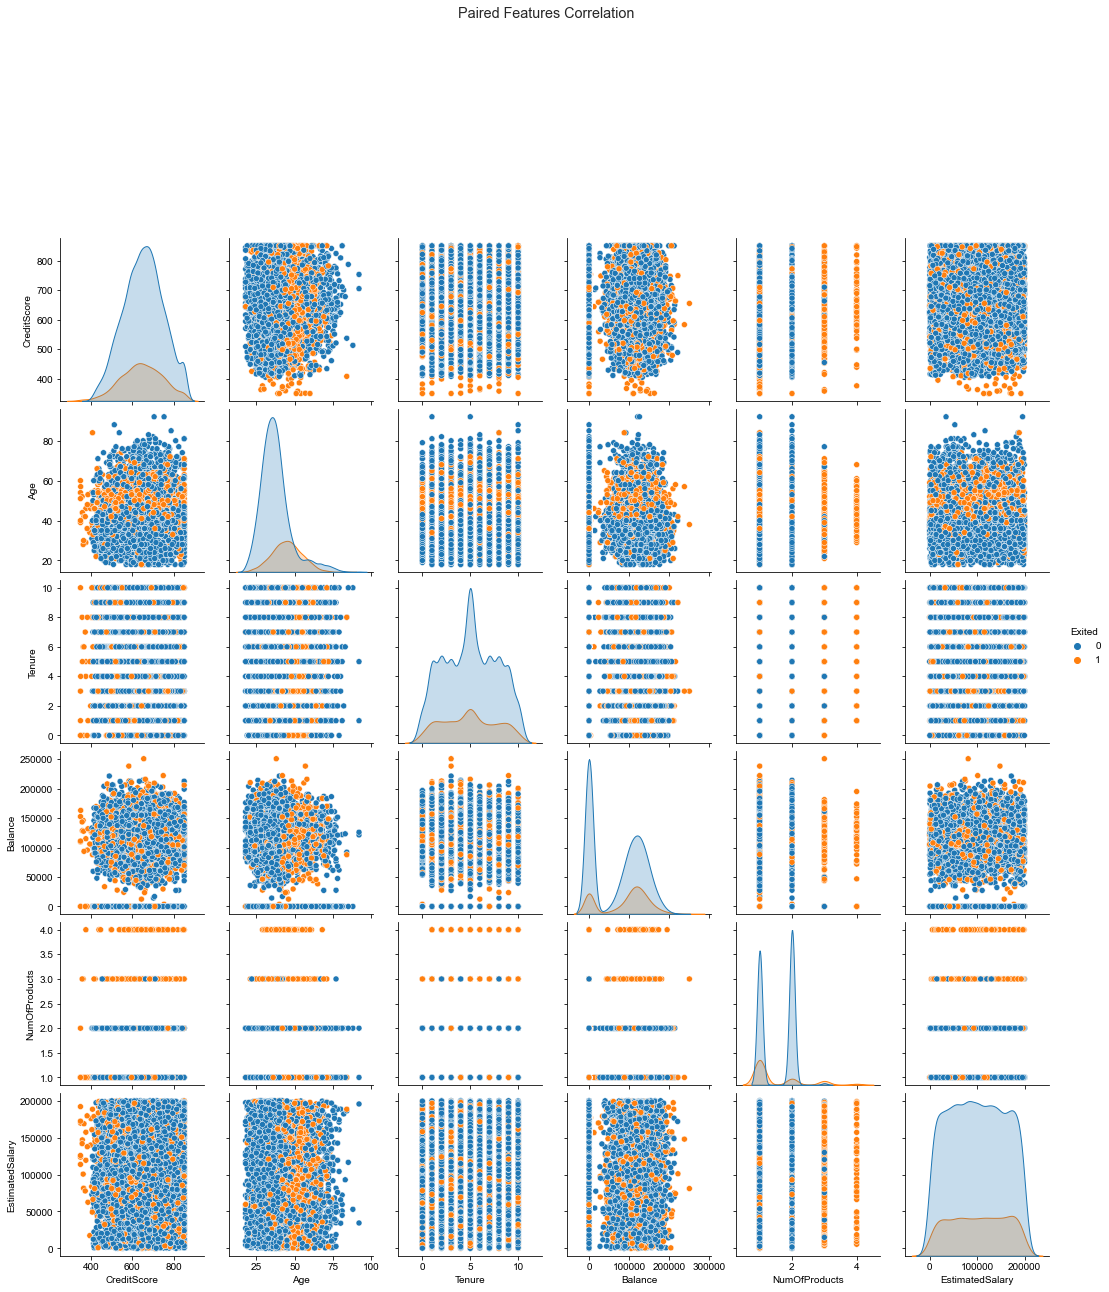

In [8]:
ax = sns.pairplot(df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Gender', 'Geography','HasCrCard', 'IsActiveMember']), 
                  hue='Exited')  # plotting pairplot to see correlation between each pair of features
sns.set(rc = {'figure.figsize':(24,24)}) # setting the plot dimensions
ax.fig.suptitle('Paired Features Correlation', y=1.2); # setting the plot title

There are quite a lot of quantitative features (6), we do not notice a clear correlation for any pair of them. However, some positive relation is observed, for example, between the account balance and the customer credit rating, as well as between the age and the balance, the age and the credit rating. In principle, this is quite logical.
There is also an interesting relation between the number of products in the bank and our target variable: the absolute majority of customers who left the bank had 3-4 products, among those who had 1-2 products, there were much fewer gone customers.
So, according to the results of visualization of quantitative variables, we can exclude multicollinearity between them.



So, our goal is to determine if the client leaves the bank. There are two answers to this question - "yes" (1) or "no" (0), thus, our target feature is categorical, and we shall solve a classification problem. Since there are only two categories, we are talking about a binary classification.
None of the 3 models known to us that solve the classification problem accepts categorical data in row form as input, therefore, first of all, we will process the categorical features of the dataframe. Let's use the universal One-Hot Encoding technique for encoding categorical features, having previously dropped the columns 'RowNumber', 'CustomerId' and 'Surname', which do not carry any additional value for building models, the latter, moreover, would lead to undesirable results during the O.H.E. application:



In [9]:
df_ohe = pd.get_dummies(df.drop(columns=['RowNumber','Surname', 'CustomerId']), 
                        drop_first=True) # coding categorical features
df_ohe.head() # checking the result

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Let's move on to the direct division of the encoded dataframe into samples: training, validation and test. As we know, we need a validation set to prevent overfitting of the model. On the test, we will check its quality. When splitting, we will set the random_state parameter to keep the split results.



In [10]:
features = df_ohe.drop(columns=['Exited']) # separating the features
target = df_ohe['Exited']  # separating the target variable
features_train, features_rest, target_train, target_rest = \
train_test_split(features, target, test_size=0.4, 
                 random_state=12345) # taking 40% of the dataset for valitaion and test  samples

In [11]:
features_valid, features_test, target_valid, target_test = \
train_test_split(features_rest, target_rest, test_size=0.5, 
                 random_state=12345) # dividing in half the data between validation and test samples

In [12]:
print(len(df), len(features_train), len(features_valid), 
      len(features_test), sep='\n') # checking the splitting result
print(len(df) == (len(features_train) + len(features_valid) + 
                  len(features_test)))  # checking the splitting result

10000
6000
2000
2000
True


Next, let's check what is the ratio of customers in the original dataframe.



In [13]:
ratio = df['Exited'].mean() # checking the gone clients share df
print(ratio)  # checking the splitting result

0.2037


So, the gone customers in our dataset are about 20%. Let's see if the corresponding samples retained this ratio:



In [14]:
for target in [target_train, target_valid, target_test]: # iterating over the target samples
    print(target.mean()) # printing the gone clients share

0.19933333333333333
0.209
0.2115


The ratio of customers who left and remained with the bank in target samples  is very close to the same ratio in the general dataset. Therefore, the sampling was made correctly.

The next and final step in sample preparation is the scaling of quantitative features through standardization. We see such lists in a separate list and perform scaling:


In [15]:
numeric = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'CreditScore',
           'EstimatedSalary'] # creating a list with quantitative ауфегкуы

scaler = StandardScaler() # creating a StandardScaler object
scaler.fit(features_train[numeric]) # fitting the StandardScaler object
features_train[numeric] = scaler.transform(features_train[numeric]) # scaling the sample features
features_valid[numeric] = scaler.transform(features_valid[numeric]) # scaling the sample features
features_test[numeric] = scaler.transform(features_test[numeric]) # scaling the sample features

**Conclusions:**
So, the samples are ready, their dimension has been checked checked and corresponds to the specified parameters. We can move on to the next step - building and adjusting the quality of the models.


##  Models Study Regardless the Imbalance of Classes in the Target Feature

Based on the results of data preparation, we know that the classes in our target feature are not balanced, their ratio is approximately 1:4 - this means that such an assessment indicator as accuracy for a random model will be quite high, so it does not suit us. The most appropriate evaluation criterion for class imbalance in the target feature is the harmonic mean of the recall and precision, that is, F1.
We already know several models that differ from each other both in quality and in the speed of data processing. We will choose the best of them for our task empirically, varying the hyperparameters and the models themselves. To search for hyperparameters, we will use an alternative to the loop - namely, the GridSearchCV class. Since GridSearchCV searches for the best hyperparameters using cross-validation, we don’t need a split into training and validation sets, so let’s unite them:




In [16]:
frames_target = [target_train, target_valid]  # creating a df list for cancatenation
sample_target = pd.concat(frames_target)  # concatenating validation and train samples
print(len(sample_target))  # checking the result
sample_target.head()  # checking the result

8000


7479    0
3411    0
6027    0
1247    0
3716    0
Name: Exited, dtype: int64

In [17]:
frames_features = [features_train, features_valid]  # creating a df list for cancatenation
sample_features = pd.concat(frames_features)  # concatenating validation and train samples
print(len(sample_features))  # checking the result
sample_features.head()  # checking the result

8000


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


### Decision Tree
Let's start checking with the first model - the decision tree, which is quite fast, but, according to statistics, the least accurate of the models known to us at the moment.
We will evaluate the quality of the model using the F1 parameter - the closer it is to 1, the better our model will be.
The quality of the predictions depends, in part, on the chosen maximum depth hyperparameter. Let's check what depth of the tree, given before training, will allow us to reach the maximum F1.
Here, as well as in subsequent steps, we will set the random_state parameter to keep the results of the pseudo-random algorithm:



In [18]:
model = DecisionTreeClassifier(random_state=12345) #  creating a model
params_grid = {'max_depth': range (1,11)}  #  setting the parameters
f1 = make_scorer(f1_score) # setting a metric for scoring
grid = GridSearchCV(model, params_grid, scoring=f1, 
                    n_jobs=-1) # creating a GridSearchCV object with the set parameters
grid.fit(sample_features, sample_target) #  fitting the model
print('F1-мера лучшей модели', grid.best_score_, 'с параметрами', 
      grid.best_params_ ) # printing the best output



F1-мера лучшей модели 0.5538193152308866 с параметрами {'max_depth': 7}


So, we did not reach the threshold of the average harmonic mean of the recall and precision of the model (0.59) set in the task, although we approached it with the best F1 result of approx. 0.55 with a  depth level of 7.

Let's check if other models will allow us to reach the desired threshold.
The next model we will test is the random forest.



### Random Forest
Random forest is a high quality but low speed prediction model. Among other random forest hyperparameters, besides depth, there is also the number of "evaluating trees" (n_estimators). The higher this parameter, the higher the quality of the model is and the lower the speed is. Combining a different number of estimators and different depths of trees, we will try to find those hyperparameters, taking into account which the model trained by the cross-validation method will give the best indicator F1:



In [19]:
model = RandomForestClassifier(random_state=12345) #  creating a model
params_grid = {'n_estimators': range (10, 100, 5), 'max_depth': range (1,11)}  #  setting the parameters
f1 = make_scorer(f1_score) # setting a metric for scoring
grid = GridSearchCV(model, params_grid, scoring=f1, 
                    n_jobs=-1) # сcreating a GridSearchCV object with the set parameters
grid.fit(sample_features, sample_target) #  fitting the model
print('F1-мера лучшей модели', grid.best_score_, 'с параметрами',
      grid.best_params_ ) # printing the best output


F1-мера лучшей модели 0.577259217652173 с параметрами {'max_depth': 10, 'n_estimators': 90}


So, we determined the optimal hyperparameters of the random forest model. The obtained quality of the model almost reached the established threshold and amounted to approx. 0.58. Let's move on to testing the last categorical target variable prediction model known to us - logistic regression.



### Logistic Regression
We know that logistic regression is just as fast in data processing speed as decision tree. At the same time, the quality is lower than the quality of a random forest.
To achieve the maximum F1, let's check how it will change depending on the -'max_iter' hyperparameter - the number of iterations. And in this case, as in the previous ones, we set the random_state=12345.


In [20]:
model = LogisticRegression(random_state=12345) #  creating a model
params_grid = {'max_iter': range (100,1000, 20)}  #  setting the parameters
f1 = make_scorer(f1_score) # setting a metric for scoring
grid = GridSearchCV(model, params_grid, scoring=f1, n_jobs=-1) # creating a GridSearchCV object with the set parameters
grid.fit(sample_features, sample_target) #  fitting the model
print('F1-мера лучшей модели', grid.best_score_, 'с параметрами', 
      grid.best_params_ ) # printing the best output


F1-мера лучшей модели 0.3309047773724323 с параметрами {'max_iter': 100}


So, the model reaches the highest F1 value at the parameter max_iter=100, that is, the minimum value of iterations that we checked. If we were to visualize all iterations, we would notice that F1 stays the same. That is, in this case, setting this hyperparameter does not allow us to improve the quality of the model.
The obtained result, however, is rather below the threshold of 0.59, as well as the results of the two previous models.


**Conclusions:**
So, we have set up and trained three target categorical feature prediction models: decision tree, random forest, and logistic regression regardless the class imbalance. By checking the optimal hyperparameters in each model, we almost managed to reach the specified F1-measure threshold of 0.59 only on a random forest model with 90 estimators with a maximum depth of 10.
The other models did not allow reaching and, moreover, exceeding the specified threshold.
Next, we will try to improve the quality of the model, taking into account the class imbalance.



## Class Imbalance Adjustment


So the first technique we'll experiment with to solve the class imbalance problem is class weighting.
We will perform weighting through the class_weight argument, assigning it the value 'balanced'. This argument exists for all classification models known to us, so we will test it on all three, varying the hyperparameters, as in the previous section.
In addition to the F1-measure, for each model we will check the AUC-ROC metric, that is, the area under the ROC-curve ("error curve"), ranging from 0 to 1. The larger this area is, the better the quality of the model is.
Since, by its nature, GridSearchCV does not allow us to calculate AUC-ROC, we will use a loop to further search for the best model.



### Class Balancing

#### Decision Tree


In [21]:
best_depth = 1 # defining the initial depth to compare with while iterating
best_f1 = 0  # defining the initial f1 value to compare with while iterating
error_square = 0 # defining the initial AUC-ROC value to compare with while iterating
for depth in range(1,11):  # iterating over the depths
    model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', 
                                   random_state=12345)  #  creating a model
    model.fit(features_train, target_train)  #  fitting on the train samples
    predictions_valid = model.predict(features_valid)  #  predicting the target on validation sample
    f1 = f1_score(target_valid, predictions_valid)  #  calculating F1
    probabilities_valid = model.predict_proba(features_valid) # calculating the class probability
    probabilities_one_valid = probabilities_valid[:, 1] # saving the probability of the class 1
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid) # calculating AUC-ROC
    if f1 > best_f1:
        best_f1 = f1  # updating as per the condition
        best_depth = depth  # updating as per the condition
        error_square = auc_roc # updating as per the condition
print('The best F1 score is {} reached with the depth {}. AUC-ROC is {}'.format(best_f1, best_depth, 
                                                                                auc_roc))  # printing the best output



The best F1 score is 0.5963791267305644 reached with the depth 5. AUC-ROC is 0.7493278147097431


So, thanks to class balancing, the result of the random tree improved (about 0.6) and exceeded the set minimum value. The area under the error curve at maximum F1 is approx. 0.75. In this case, the best F1-measure is already achieved at a depth of 5.



####  Random Forest



In [22]:
best_depth = 1  # defining the initial depth to compare with while iterating
best_f1 = 0  # defining the initial f1 value to compare with while iterating
best_n_estimators = 1  # defining the initial number of estimators to compare with while iterating
error_square = 0 # defining the initial AUC-ROC value to compare with while iterating
for depth in range(1,11):  # iterating over the depths
    for num in range(10, 100, 5):  # iterating over the number of estimatos
        model =  RandomForestClassifier(random_state=12345, class_weight='balanced', 
                                        n_estimators=num, max_depth=depth) # creating a model
        model.fit(features_train, target_train) # fitting on the train samples
        predictions_valid = model.predict(features_valid)  #  predicting the target on validation sample
        f1 = f1_score(target_valid, predictions_valid)  #  calculating F1
        probabilities_valid = model.predict_proba(features_valid) # calculating the class probability
        probabilities_one_valid = probabilities_valid[:, 1] # saving the probability of the class 1
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid) # calculating AUC-ROC
        if f1 > best_f1:
            best_f1 = f1  # updating as per the condition
            best_depth = depth  # updating as per the condition
            best_n_estimators = num  # updating as per the condition
            error_square = auc_roc # updating as per the condition
print('The best F1 score is {} reached with the depth {} and {} estimators. AUC-ROC is {}'.
      format(best_f1, best_depth, best_n_estimators, auc_roc))  # printing the best output

The best F1 score is 0.6337543053960963 reached with the depth 9 and 80 estimators. AUC-ROC is 0.8517623503650519


As a result of class balancing, we managed to significantly improve the result of the random forest: from 0.58 to 0.63. The obtained area under the ROC-curve increased compared to the best results of the decision tree, reaching 0.85. And in the case of a random forest, when balancing classes, the optimal hyperparameters have changed.


####  Logistic Regression


In [23]:
best_n_iter = 1  # defining the initial number of iteratins to compare with while iterating
best_f1 = 0  # defining the initial f1 value to compare with while iterating
error_square = 0 # defining the initial AUC-ROC value to compare with while iterating
for it in range(100,1000, 20):  # iterating over the number of iterations
    model = LogisticRegression(max_iter=it, class_weight='balanced', random_state=12345) #  creating a model
    model.fit(features_train, target_train)  # fitting on the train samples
    predictions_valid = model.predict(features_valid) #  predicting the target on validation sample
    f1 = f1_score(target_valid, predictions_valid)  #  calculating F1
    probabilities_valid = model.predict_proba(features_valid) # calculating the class probability
    probabilities_one_valid = probabilities_valid[:, 1] # saving the probability of the class 1
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid) # calculating AUC-ROC
    if f1 > best_f1:
        best_f1 = f1  # updating as per the condition
        best_n_iter = it  # updating as per the condition
        error_square = auc_roc # updating as per the condition
print('The best F1 score is {} reached with {} iterations. AUC-ROC is {}'.
      format(best_f1, best_n_iter, auc_roc))  # printing the best output

The best F1 score is 0.4888507718696398 reached with 100 iterations. AUC-ROC is 0.7637310291013133


In the case of logistic regression, the model significantly improved the quality, but did not reach the given threshold.
It is interesting to note that despite the lower score of the F1-measure compared to the decision tree, the area under the error curve turned out to be slightly larger.

So, in the course of applying class balancing, we managed to reach and exceed the specified F1-measure threshold in the random forest model. The same model has the largest area under the error curve, which also indicates its better quality compared to the other two. Next, we will check if we can improve this result by applying other techniques for dealing with class imbalance.

Since, according to the results of the first two experiments, among the models in terms of the F1-measure, the random forest model is clearly in the lead, we will conduct all subsequent experiments on it.



### Upsampling

So, let's try to balance our classes by increasing the sample dimention, increasing the presence in the sample of objects of a rarer class, that is, 1. As we remember, the ratio of classes 1 and 0 in our samples is approximately 1:4. Let's create a special function and apply it to the sample:


In [24]:
# defining a upsampling function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    target_upsampled, features_upsampled = shuffle(target_upsampled, features_upsampled, random_state=12345)
    return features_upsampled, target_upsampled 

In [25]:
features_upsampled, target_upsampled = upsample(features_train, 
                                                target_train, 4) # applying the function to train data
print(features_upsampled.shape) # checking the dimension of the upsampled features
print(target_upsampled.shape) # пchecking the dimension of the upsampled target
print(len(target_upsampled[target_upsampled==1])) # checking the number of class 1 objects

(9588, 11)
(9588,)
4784


So, through upsampling, we have achieved a class ratio of almost 1:1. Next, we will  find the optimal hyperparameters with which the random forest shows the highest value of the F1-measure on the upsampled sample:



In [26]:
best_depth = 1  # defining the initial depth to compare with while iterating
best_f1 = 0  # defining the initial f1 value to compare with while iterating
best_n_estimators = 1  # defining the initial number of estimators to compare with while iterating
error_square = 0 # defining the initial AUC-ROC value to compare with while iterating
for depth in range(1,11):  # iterating over the depths
    for num in range(10, 100, 5):  # iterating over the number of estimatos
        model =  RandomForestClassifier(random_state=12345, n_estimators=num, max_depth=depth) # creating a model
        model.fit(features_upsampled, target_upsampled) # fitting on the upsampled train samples
        predictions_valid = model.predict(features_valid)  #  predicting the validation target
        f1 = f1_score(target_valid, predictions_valid)  #  calculating F1
        probabilities_valid = model.predict_proba(features_valid) # calculating class probability
        probabilities_one_valid = probabilities_valid[:, 1] # saving the probability of the class 1
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid) # calculating AUC-ROC
        if f1 > best_f1:
            best_f1 = f1  # updating as per the condition
            best_depth = depth  # updating as per the condition
            best_n_estimators = num  # updating as per the condition
            error_square = auc_roc # updating as per the condition
print('The best F1 score is {} reached with the depth {} and {} estimators.AUC-ROC is {}'.
      format(best_f1, best_depth, best_n_estimators, auc_roc))  # printing the best output

The best F1 score is 0.6291179596174282 reached with the depth 9 and 70 estimators.AUC-ROC is 0.8542182084333924


After upsampling, the result practically did not change compared to the balancing, and the F1-measure reached 0.63 of the possible maximum of 1. AUC-ROC is also approx. 0.85. At the same time, the optimal number of estimators has once again changed, but the depth remained the same.

Next, we will check whether we can achieve a similar or better result in the opposite way - by downsampling and choosing the optimal random forest model  trained on a downsampled sample.



### Downsampling

This technique will be tested according to the algorithm as above: we will create a function to reduce the sample, train the model on the reduced sample and select hyperparameters for which the F1-measure will reach the maximum result:



In [27]:
# defining a downsampling function
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [28]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 
                                                      0.25) # applying the function to train data
print(features_downsampled.shape) # checking the dimension of the downsampled features
print(target_downsampled.shape) # пchecking the dimension of the downsampled target
print(len(target_downsampled[target_downsampled==1])) # checking the number of class 1 objects

(2397, 11)
(2397,)
1196


In [29]:
best_depth = 1  # defining the initial depth to compare with while iterating
best_f1 = 0  # defining the initial f1 value to compare with while iterating
best_n_estimators = 1  # defining the initial number of estimators to compare with while iterating
error_square = 0 # defining the initial AUC-ROC value to compare with while iterating
for depth in range(1,11):  # iterating over the depths
    for num in range(10, 100, 5):  # iterating over the number of estimatos
        model =  RandomForestClassifier(random_state=12345, n_estimators=num, max_depth=depth) # creating a model
        model.fit(features_downsampled, target_downsampled) # fitting on the downsampled train samples
        predictions_valid = model.predict(features_valid)  #  predicting the validation target
        f1 = f1_score(target_valid, predictions_valid)  #  calculating F1
        probabilities_valid = model.predict_proba(features_valid) # calculating class probability
        probabilities_one_valid = probabilities_valid[:, 1] # saving the probability of the class 1
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid) # calculating AUC-ROC
        if f1 > best_f1:
            best_f1 = f1  # updating as per the condition
            best_depth = depth  # updating as per the condition
            best_n_estimators = num  # updating as per the condition
            error_square = auc_roc  # updating as per the condition
print('The best F1 score is {} reached with the depth {} and {} estimators. AUC-ROC is {}'.
      format(best_f1, best_depth, best_n_estimators, auc_roc))  # printing the best output

The best F1 score is 0.6092184368737475 reached with the depth 4 and 10 estimators. AUC-ROC is 0.8492006363454897


So, the obtained result  exceeded the specified threshold of 0.59, but, nevertheless, it is lower than doing upsampling. Still, the more training data we have, the better model is. The AUC-ROC value remained practically unchanged. It is noteworthy that in this case, the model gave the highest F1 score with completely different hyperparameters (depth - 4, number of raters - 10).



### Threshold Change

Another technique for improving the quality of a model is changing the threshold. In this case, we can apply it in conjunction with one of the previous techniques for imbalance adjustment. We choose the model that gave the maximum result after tuning and check the value of the F1-measure and AUC-ROC when the threshold is changed. Perhaps the standard threshold is not optimal for predicting further cooperation between the bank and customers.
As a result of the study, the best quality was shown by random forest models with balanced classes and trained on an upsampled sample.
Let's try to find a model with the best F1-measure, varying not only the hyperparameters, but also the threshold value:


In [30]:
best_threshold = 0.5 # defining the initial threshold
best_f1 = 0.6291179596174282 # defining the initial f1 value to compare with while iterating
best_depth = 9  # defining the initial depth to compare with while iterating
best_n_estimators = 70  # defining the initial number of estimators to compare with while iterating
error_square= 0.8542182084333924 # defining the initial AUC-ROC value to compare with while iterating
for threshold in np.arange(0.2, 0.7, 0.1): # iterating over the thresholds
    for depth in range(1,11):  # iterating over the depths
        for num in range(10, 100, 5):  # iterating over the number of estimatos
            model = RandomForestClassifier(max_depth=depth, 
                                           n_estimators=num, random_state=12345) # creating a model
            model.fit(features_upsampled, target_upsampled) # fitting on the upsampled united samples
            predicted_proba = model.predict_proba(features_valid) # calculating class probability
            predictions_valid = \
            (predicted_proba [:,1] >= threshold).astype('int') # predicting the validation target as per the updated threshold
            f1 = f1_score(target_valid, predictions_valid) # calculating  F1
            auc_roc = roc_auc_score(target_valid, predicted_proba [:,1]) # calculating AUC-ROC
            if f1 > best_f1:
                best_f1 = f1  # updating as per the condition
                best_threshold = threshold  # updating as per the condition
                best_depth = depth  # updating as per the condition
                best_n_estimators = num  # updating as per the condition
                error_square = auc_roc # оupdating as per the condition
print('The best F1 score is {} reached with the threshold {}, the depth {} and {} estimators. AUC-ROC is {}'.
      format(best_f1, best_threshold, best_depth, best_n_estimators, error_square)) # printing the best output


The best F1 score is 0.6359102244389028 reached with the threshold 0.6000000000000001, the depth 8 and 60 estimators. AUC-ROC is 0.8552011565518783


So, the best model with an F1-measure equal to approx. 0.64 and an area under the ROC curve of approx. 0.86 is a random forest model with 60 estimators and a maximum depth of 8.



Being the slowest, let's check how long it takes to train a random forest model on the upsampled data with optimal hyperparameters:



In [31]:
%%time
model =  RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=8) # creating a model
model.fit(features_upsampled, target_upsampled) # fitting the model on the upsampled data

Wall time: 344 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

**Conclusions:** So,  applying various techniques for class imbalance adjustment, as well as combining them, we managed to identify a model with optimal hyperparameters and threshold, which guarantee the maximum quality of the model through the highest harmonic mean of recall and precision. Such a model was a random forest trained on upsampled data for overcome the imbalance in classes, with a threshold of 0.6. We also made sure that despite the speed of this algorithm, training of the selected model takes less than 1 second.



## Model Quality Test

We prepared a test sample at the first step of our study.
We will check the quality of the model on it in the same way: having trained the model on the united training and validation sample, which we will balance through upsampling, we will calculate the value of the F1-measure and the area of the error curve and compare the result with the one we obtained earlier on the validation data:


    

In [32]:
sample_features_upsampled, sample_target_upsampled = upsample(sample_features, sample_target, 
                                                              4) # applying the function to validation+train data
print(sample_features_upsampled.shape) # checking the dimension of the upsampled features
print(sample_target_upsampled.shape) # checking the dimension of the upsampled target
print(len(sample_target_upsampled[sample_target_upsampled==1])) # checking the number of class 1 objects

(12842, 11)
(12842,)
6456


In [33]:
model =  RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=8)  # creating a modelь
model.fit(sample_features_upsampled, sample_target_upsampled) # fitting the model on the upsampled train+validation data
predicted_proba = model.predict_proba(features_test) # calculating class probability
predictions_test = (predicted_proba [:,1] >= 0.6).astype('int') # predicting the test target
f1 = f1_score(target_test, predictions_test) # calculating F1
auc_roc = roc_auc_score(target_test, predicted_proba [:,1]) # calculating AUC-ROC
print('On the test sample the model has reached F1 score equal to {} and AUC-ROC equal to {}'.
      format(f1, auc_roc)) # printing the output

On the test sample the model has reached F1 score equal to 0.6223337515683813 and AUC-ROC equal to 0.8568952930047926


So, the model the F1, when tested on a test sample, decreased by about 0.014 and amounted to about 0.62. This means that our model does not always correctly predict whether the client will leave the bank, there are both false positive and false negative predictions in it. However, the established F1-measure threshold of 0.59 has been exceeded. At the same time, the AUC-ROC value remained practically unchanged and amounted to about 0.86 - quite far from the ideal, but much better than a random model.



**Conclusions:**
So, when checking on the test sample, the model quality turned out to be approximately 1% lower than on the validation one. As we already know, this is a normal phenomenon, it is important that this difference is relatively small, therefore, we managed to avoid retraining the model.


## Study Results

In the course of this study, we built, adjusted by optimal hyperparameters three known to us models for predicting a categorical target:
 - decision tree,
 - random forest,
 - linear regression.

We checked the results of model fitting on validation data, previously sampled from the general dataset, and also balanced the classes in order to obtain the maximum F1 quality indicator.
According to the results of the comparison, it turned out that  **random forest with 60 "evaluator trees" and a maximum depth of 8 and a threshold of 0.6, trained on an increased sample** has the best prediction quality.

This model withstood the test with the test data, also pre-sampled from the general dataset. The results of this experiment coincided with the expected ones: the prediction quality slightly decreased, however, it remained at a fairly high level, which means that we managed to avoid overfitting the model. At the same time, the F1 indicator exceeded the threshold set in the task: this means that we also avoid underfitting the model.

We can also state that the chosen model is sane (adequate): the resulting AUC-ROC value is much higher than 0.5 of the random model

This study was conducted based on the studied prediction models, studied hyperparameters and known class imbalance adjustment techniques. Using a different model or tuning additional hyperparameters that we have not studied yet would probably allow us to achieve an higher prediction quality score.


